In [1]:
import pandas as pd 
df_flights = pd.read_csv('flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

Year: The year of the flight (all records are from 2013)
Month: The month of the flight
DayofMonth: The day of the month on which the flight departed
DayOfWeek: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
Carrier: The two-letter abbreviation for the airline.
OriginAirportID: A unique numeric identifier for the departure aiport
OriginAirportName: The full name of the departure airport
OriginCity: The departure airport city
OriginState: The departure airport state
DestAirportID: A unique numeric identifier for the destination aiport
DestAirportName: The full name of the destination airport
DestCity: The destination airport city
DestState: The destination airport state
CRSDepTime: The scheduled departure time
DepDelay: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
DelDelay15: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
CRSArrTime: The scheduled arrival time
ArrDelay: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
ArrDelay15: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
Cancelled: A binary indicator that the flight was cancelled

In [2]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [3]:
df_flights['DepDel15'].fillna(0.0, inplace = True)

In [4]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           271940 non-null  float64
 16  CR

DepDelay Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_18780\1341978040.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ArrDelay Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_18780\1341978040.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


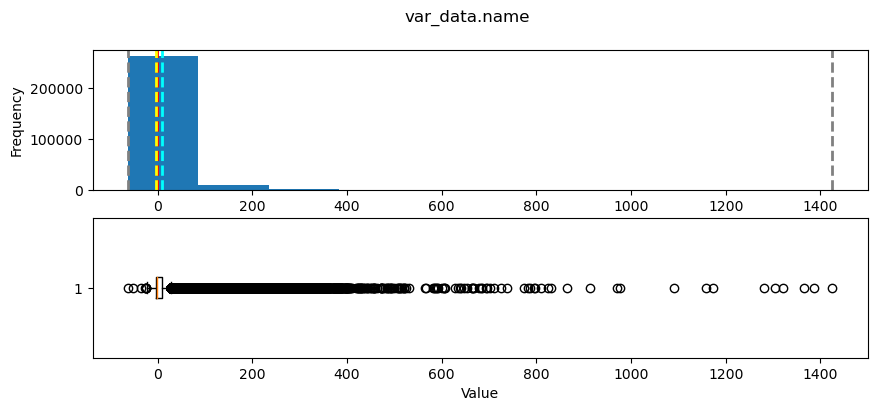

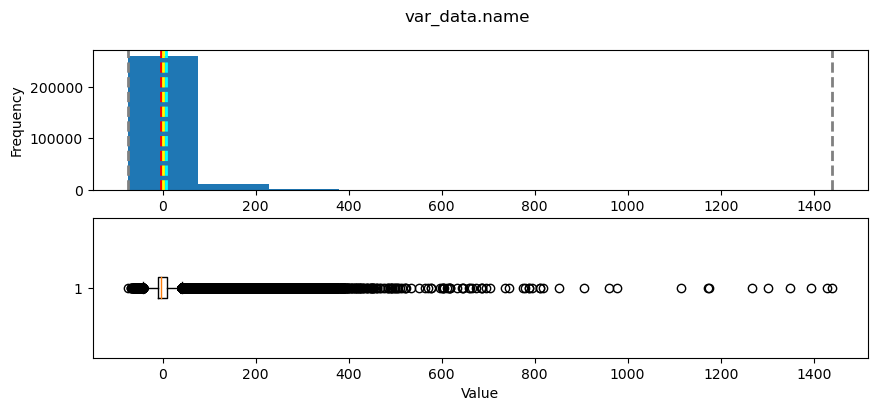

In [8]:
# Create a function that we can re-use
%matplotlib inline
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                                            mean_val,
                                                                                                            med_val,
                                                                                                            mod_val,
                                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('var_data.name')

    # Show the figure
    fig.show()
delayFields = ['DepDelay' , 'ArrDelay']
for col in delayFields:
    show_distribution(df_flights[col])

DepDelay Minimum:-11.00
Mean:-0.92
Median:-2.00
Mode:-3.00
Maximum:16.00



C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_18780\1341978040.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ArrDelay Minimum:-32.00
Mean:-5.03
Median:-6.00
Mode:0.00
Maximum:37.00



C:\Users\Win10x64_Bit\AppData\Local\Temp\ipykernel_18780\1341978040.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


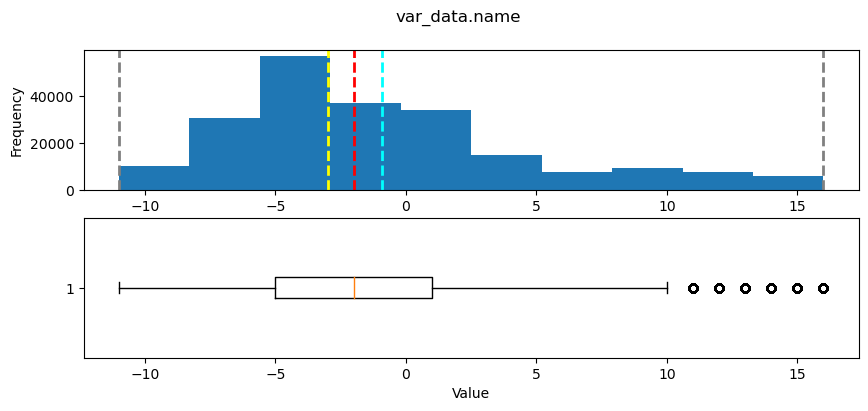

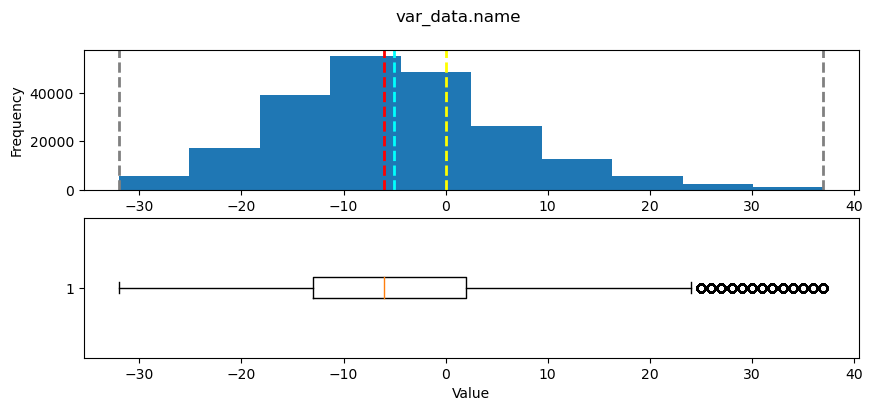

In [9]:
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]

DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]

for col in delayFields:
    show_distribution(df_flights[col])

In [10]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


In [11]:
df_flights[delayFields].mean()

DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

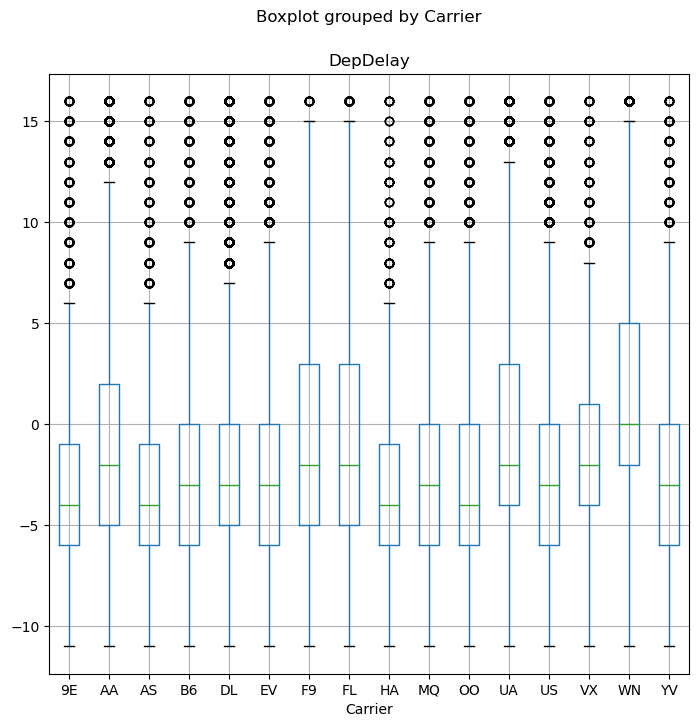

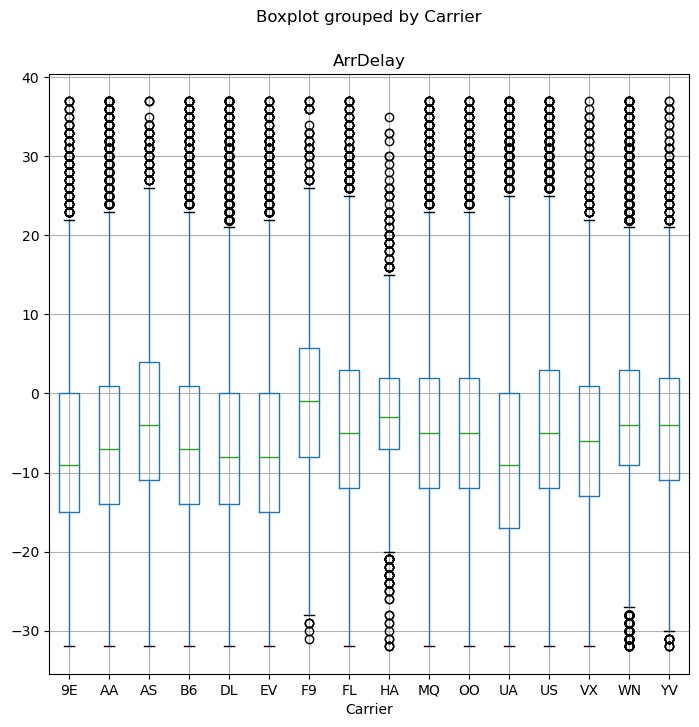

In [15]:
for col in delayFields:
    df_flights.boxplot(column=col, by='Carrier', figsize=(8,8))

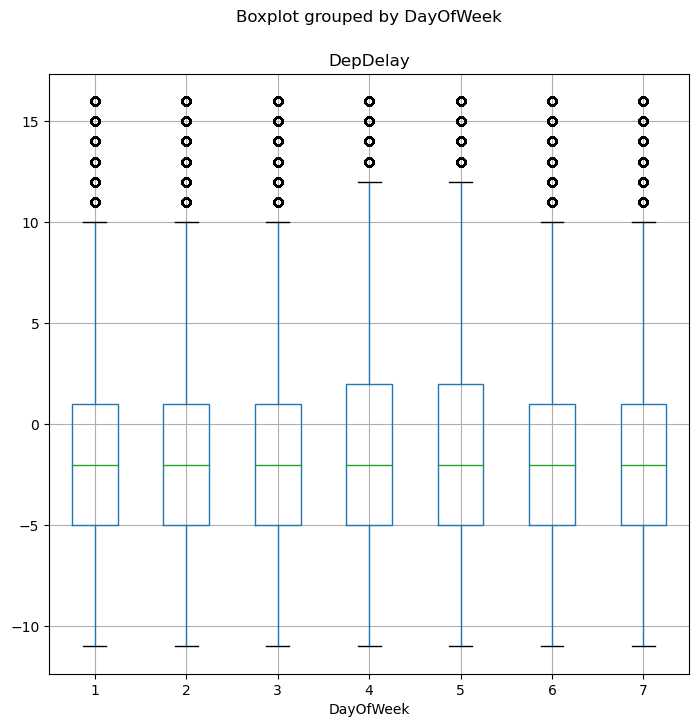

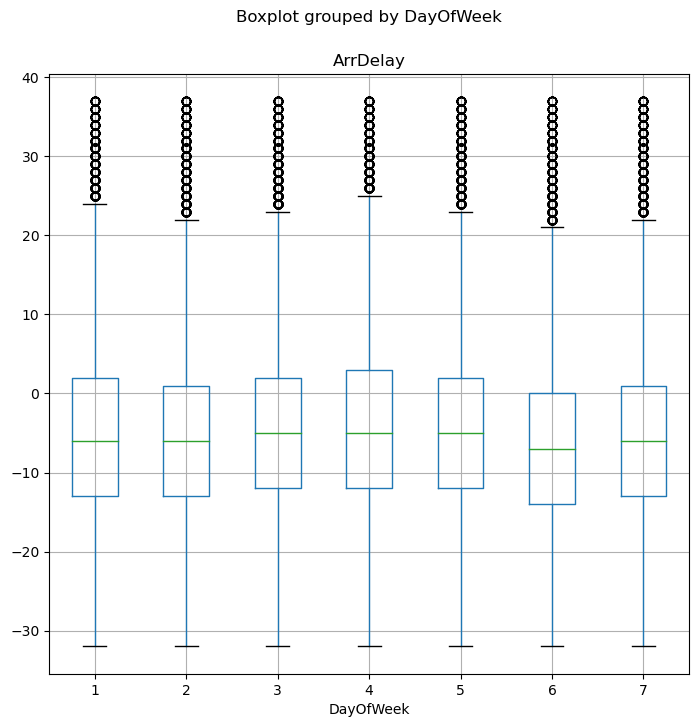

In [16]:
for col in delayFields:
    df_flights.boxplot(column=col, by='DayOfWeek', figsize=(8,8))

,DepDelay
OriginAirportName,
Long Beach Airport,-3.447844
Richmond International,-3.198073
Ted Stevens Anchorage International,-3.149758
Tucson International,-2.989154
Memphis International,-2.962737
...,...
Denver International,0.807272
Metropolitan Oakland International,0.964853
William P Hobby,1.561927


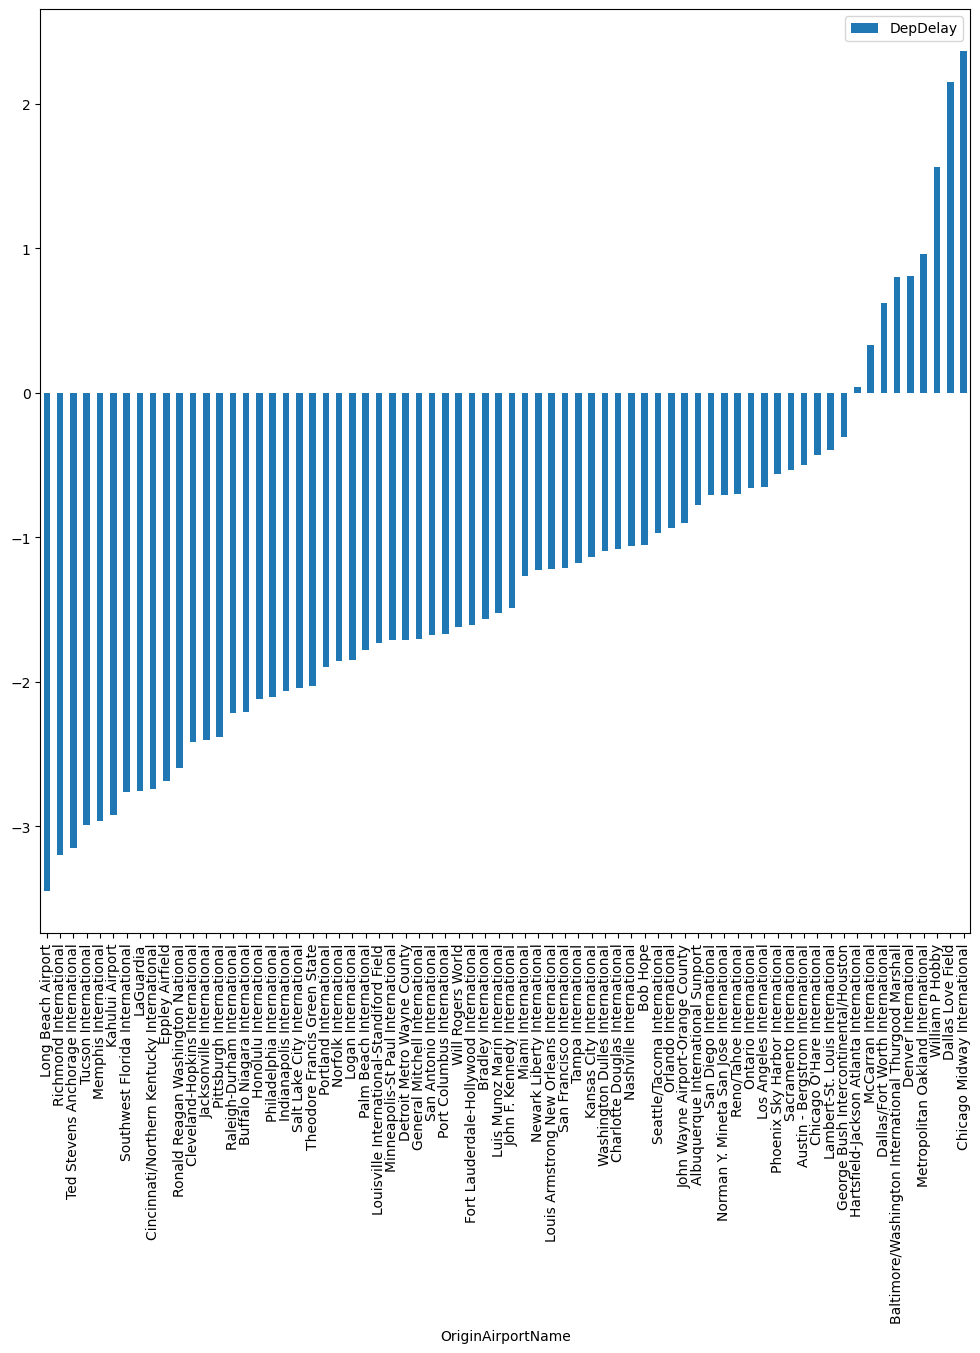

In [17]:
departure_airport_group = df_flights.groupby(df_flights.OriginAirportName)
mean_departure_delay = pd.DataFrame(departure_airport_group['DepDelay'].mean()).sort_values('DepDelay')
mean_departure_delay.plot(kind = "bar", figsize=(12,12))
mean_departure_delay

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

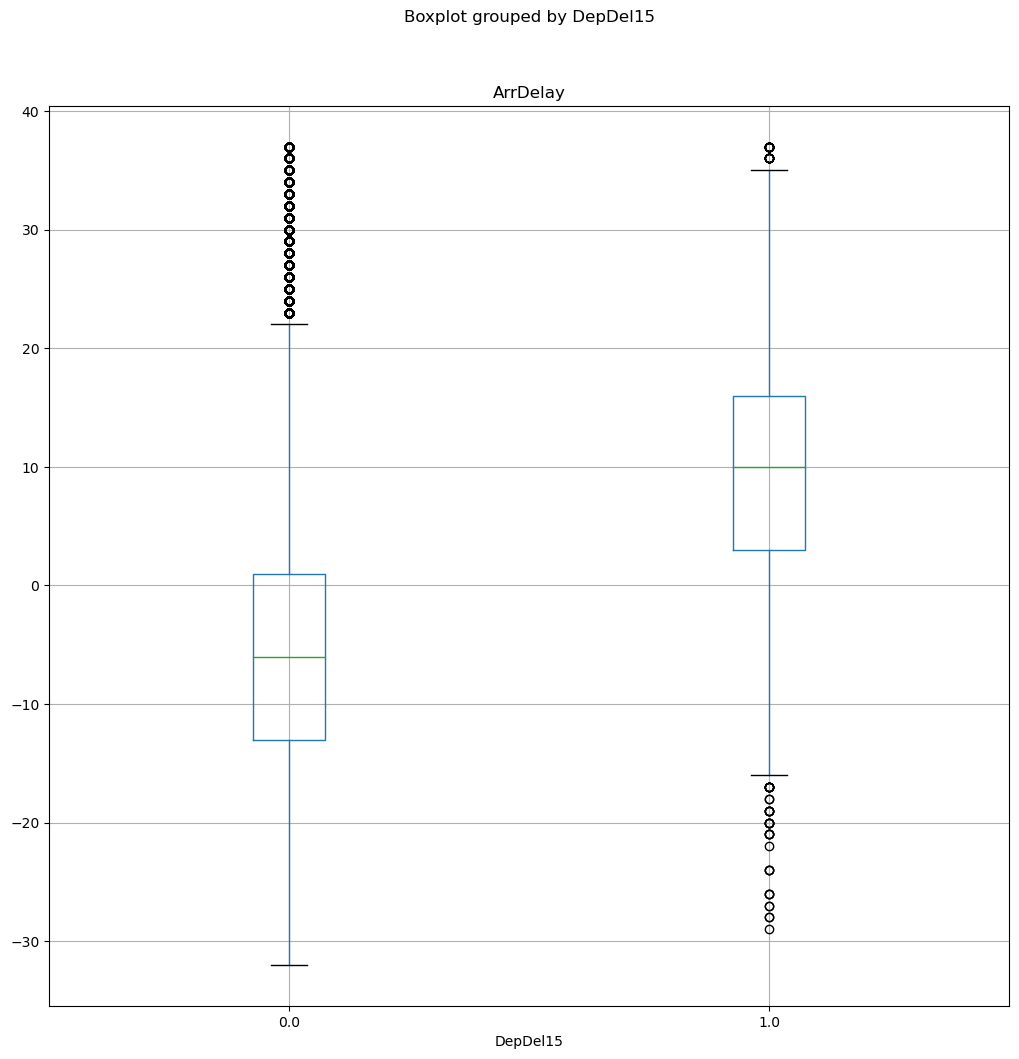

In [18]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))